In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

import seaborn as sns
import random as rn
import copy as copy

import time

c:\Users\Lavigi\programmi\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('imbd_cleaned.csv')

X = df.select_dtypes(include=['number'])
X = X.drop(['averageRating'], axis = 1)
X = X.values
y = np.array(df['rating'])

In [3]:
df

,originalTitle,rating,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,...,genres,castNumber,companiesNumber,averageRating,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal
0,Carmencita,"(5, 6]",1894,1.0,0.000000,7.644919,1.098612,0.000000,4,1.386294,...,"Documentary,Short",0.693147,1.386294,5.7,"['\\N', 'DE', 'US', 'HU', 'GR', 'RU', 'UA', 'JP']",2.302585,0.000000,0.693147,['silent'],0.0
1,Un bon bock,"(5, 6]",1892,12.0,0.000000,5.214936,1.098612,0.000000,2,0.000000,...,"Animation,Short",0.000000,0.000000,5.4,"['\\N', 'HU', 'DE', 'FR', 'RO', 'RU', 'JP']",1.386294,0.000000,0.693147,['silent'],0.0
2,Chinese Opium Den,"(4, 5]",1894,1.0,0.000000,5.278115,0.693147,0.000000,1,0.000000,...,Short,0.000000,0.693147,5.0,"['\\N', 'US', 'DE', 'PT', 'HU', 'RU']",1.609438,0.000000,0.693147,['silent'],0.0
3,Edison Kinetoscopic Record of a Sneeze,"(5, 6]",1894,1.0,0.693147,7.713338,1.386294,0.000000,4,1.098612,...,"Documentary,Short",0.693147,1.945910,5.4,"['\\N', 'UA', 'JP', 'HU', 'US', 'DE', 'RU']",1.945910,0.000000,0.693147,['silent'],0.0
4,Autour d'une cabine,"(6, 7]",1894,2.0,0.000000,7.107425,2.772589,0.000000,1,0.000000,...,"Animation,Short",0.000000,0.000000,6.1,"['\\N', 'ES', 'US', 'FR', 'HU', 'RU', 'UA']",1.386294,0.000000,0.693147,['silent'],0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148619,Nuestra película,"(6, 7]",1993,96.0,0.000000,2.484907,0.000000,0.000000,11,0.000000,...,Documentary,0.000000,1.098612,7.0,"['\\N', 'CO']",0.693147,0.693147,0.693147,[],0.0
148620,Eco,"(6, 7]",2019,14.0,0.000000,2.772589,1.609438,0.693147,52,0.693147,...,"Drama,Short",1.945910,1.386294,6.4,"['\\N', 'ES']",1.791759,0.693147,0.693147,[],0.0
148621,Women Take Center Stage,"(5, 6]",2019,0.0,0.000000,2.564949,1.098612,1.386294,32,0.000000,...,Reality-TV,0.693147,0.000000,5.6,['\\N'],0.000000,0.000000,0.000000,[],0.0
148622,Horrid Henry and the Christening Crisis,"(7, 8]",2011,10.0,0.000000,2.302585,0.693147,0.000000,15,0.000000,...,"Adventure,Animation,Comedy",2.079442,0.000000,7.1,['\\N'],0.000000,1.386294,0.693147,[],0.0


## Data Partitioning

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
clf = HistGradientBoostingClassifier(learning_rate=1.0, max_depth=2, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.36725127837086213
F1-score [0.         0.         0.00516796 0.00383509 0.02125399 0.27648202
 0.32591205 0.52907553 0.09114359 0.03255485]


c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      (0, 1]       0.00      0.00      0.00        26
      (1, 2]       0.00      0.00      0.00       141
      (2, 3]       0.03      0.00      0.01       353
      (3, 4]       0.12      0.00      0.00      1027
      (4, 5]       0.29      0.01      0.02      2719
      (5, 6]       0.29      0.27      0.28      6372
      (6, 7]       0.32      0.33      0.33     11643
      (7, 8]       0.42      0.72      0.53     14463
      (8, 9]       0.24      0.06      0.09      6563
     (9, 10]       0.17      0.02      0.03      1281

    accuracy                           0.37     44588
   macro avg       0.19      0.14      0.13     44588
weighted avg       0.32      0.37      0.31     44588



c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# XGBoost
https://xgboost.readthedocs.io/en/stable/python/python_intro.html

In [22]:
# !pip install xgboost

In [8]:
import numpy as np

def convert_interval_to_numeric(interval):
    # Rimuovi le parentesi e dividi per la virgola
    lower, upper = interval[1:-1].split(', ')
    # Converti in float e calcola il punto medio
    return int(lower)

# Applica la conversione a y_train e y_test
y_train_numeric = np.array([convert_interval_to_numeric(interval) for interval in y_train])
y_test_numeric = np.array([convert_interval_to_numeric(interval) for interval in y_test])

print("y_train convertito:", y_train_numeric)
print("y_test convertito:", y_test_numeric)


y_train convertito: [6 7 7 ... 6 8 6]
y_test convertito: [8 7 6 ... 5 4 5]


In [9]:
from xgboost import XGBClassifier

In [10]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

# Definisci il modello
clf = XGBClassifier(objective='binary:logistic', tree_method='exact', use_label_encoder=True, random_state=42)

# Definisci la griglia di parametri
param_dist = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_lambda': [0, 1, 10],
    'reg_alpha': [0, 0.1, 1]
}

# Specifica il numero di iterazioni
n_iter = 30 # Puoi modificare questo valore in base alle tue esigenze

random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, scoring='accuracy',
                                   cv=3, verbose=2, n_jobs=-1, n_iter=n_iter, error_score='raise'
                                   )

# Esegui la random search
random_search.fit(X_train, y_train_numeric)

# Stampa i migliori parametri
print("Migliori parametri trovati:", random_search.best_params_)
print("Miglior punteggio:", random_search.best_score_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


c:\Users\Lavigi\programmi\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:06:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Migliori parametri trovati: {'subsample': 0.8, 'reg_lambda': 10, 'reg_alpha': 1, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Miglior punteggio: 0.41193429271165655


In [11]:

# Definisci il modello con i migliori iperparametri trovati
best_model = XGBClassifier(
    objective='binary:logistic',
    tree_method='exact',
    random_state=42,
    subsample=0.8,
    reg_lambda=10,
    reg_alpha=1,
    n_estimators=300,
    max_depth=7,
    learning_rate=0.1,
    gamma=0,
    colsample_bytree=0.8, probability=True
)

# Addestra il modello con i dati di addestramento
best_model.fit(X_train, y_train_numeric)

# evals_result = best_model.evals_result()
# epochs = len(evals_result['validation_0']['logloss'])
# print("Numero medio di epoch del miglior modello:", epochs)

c:\Users\Lavigi\programmi\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:44:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "probability" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [13]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Supponendo che y_pred e y_test_numeric siano già definiti
y_pred = best_model.predict(X_test)

# Definire gli intervalli
intervals = ['(0,1]', '(1,2]', '(2,3]', '(3,4]', '(4,5]', '(5,6]', '(6,7]', '(7,8]', '(8,9]', '(9,10]']

# Stampare l'accuratezza
print('Accuracy %s' % accuracy_score(y_test_numeric, y_pred))

# Stampare il F1-score
print('F1-score %s' % f1_score(y_test_numeric, y_pred, average=None))

print(classification_report(y_test_numeric, y_pred, target_names=intervals))

Accuracy 0.41212882389880684
F1-score [0.34285714 0.11111111 0.07179487 0.09007506 0.19858926 0.30448598
 0.38063034 0.55058657 0.19477866 0.22289157]
              precision    recall  f1-score   support

       (0,1]       0.67      0.23      0.34        26
       (1,2]       0.43      0.06      0.11       141
       (2,3]       0.38      0.04      0.07       353
       (3,4]       0.31      0.05      0.09      1027
       (4,5]       0.38      0.13      0.20      2719
       (5,6]       0.38      0.26      0.30      6372
       (6,7]       0.38      0.38      0.38     11643
       (7,8]       0.43      0.75      0.55     14463
       (8,9]       0.38      0.13      0.19      6563
      (9,10]       0.49      0.14      0.22      1281

    accuracy                           0.41     44588
   macro avg       0.42      0.22      0.25     44588
weighted avg       0.40      0.41      0.37     44588



In [ ]:
# # Calcola la ROC curve e la Precision-Recall curve
# y_pred_proba = best_model.predict_proba(X_test)

# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, roc_auc_score
# from sklearn.preprocessing import label_binarize

# # Supponiamo che questo sia il tuo dizionario di mapping
# class_mapping = {0:'(0,1]', 1:'(1,2]', 2:'(2,3]', 3:'(3,4]', 4:'(4,5]', 5:'(5,6]', 6:'(6,7]', 7:'(7,8]', 8:'(8,9]', 9:'(9,10]'}

# # Classi uniche nel dataset
# classes = np.unique(y_test)

# # Binarizza y_test
# y_test_binarized = label_binarize(y_test, classes=classes)

# plt.figure(figsize=(10, 8))


# for i, class_label in enumerate(class_labels):
#     fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
#     auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
    
#     # Check if class_label exists in class_mapping
#     label = class_mapping.get(class_label, "Unknown class")
#     plt.plot(fpr, tpr, label=f"{label} (AUC = {auc:.2f})")

# # Linea casuale per riferimento
# plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve")
# plt.legend(loc="best")
# plt.show()



NameError: name 'class_labels' is not defined

<Figure size 1000x800 with 0 Axes>

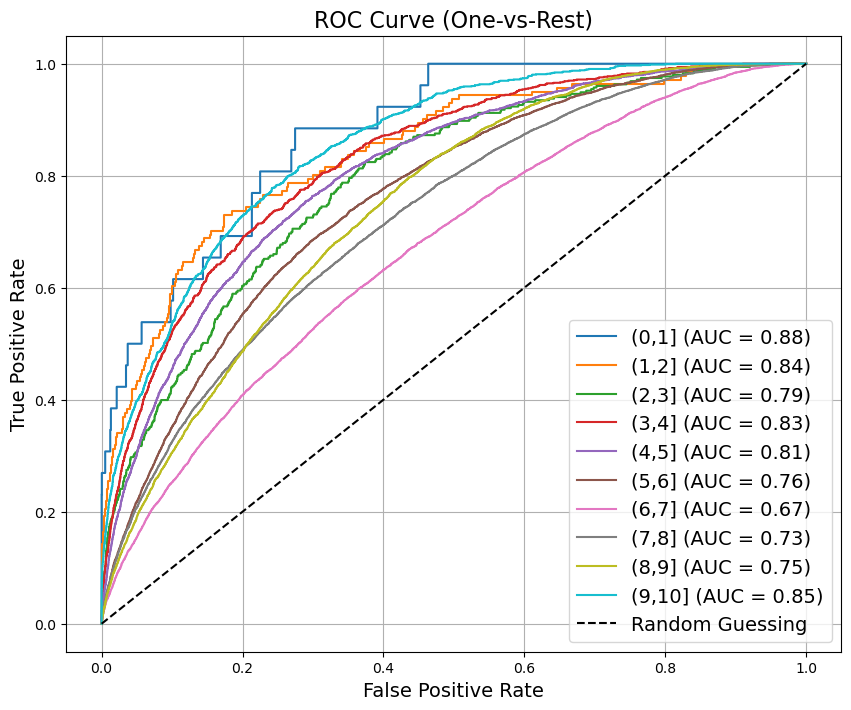

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Supponiamo che y_pred e y_test_numeric siano già definiti
# y_pred = best_model.predict(X_test)
# y_pred_proba = best_model.predict_proba(X_test)

# Definire gli intervalli
intervals = ['(0,1]', '(1,2]', '(2,3]', '(3,4]', '(4,5]', '(5,6]', '(6,7]', '(7,8]', '(8,9]', '(9,10]']

# Binarizzare le etichette di test
y_test_bin = label_binarize(y_test_numeric, classes=range(10))

plt.figure(figsize=(10, 8))

for i in range(10):
    # ROC curve per la classe i
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])
    
    # Traccia la curva ROC con il nome della classe originale
    plt.plot(fpr, tpr, label=f"{intervals[i]} (AUC = {auc:.2f})")

# Linea casuale per riferimento
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

# Personalizza il grafico
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve (One-vs-Rest)", fontsize=16)
plt.legend(loc="best", fontsize=14)
plt.grid()
plt.show()

In [16]:
# AUC (AREA UNDER THE CURVE, Ti dice quanto bene il modello riesce a distinguere tra le classi.) 
# media di tutte le classi (le singole sono gia nel grafico)
roc_auc_score(y_test_binarized, y_pred_proba, multi_class="ovr", average="macro")

0.7904375409838843

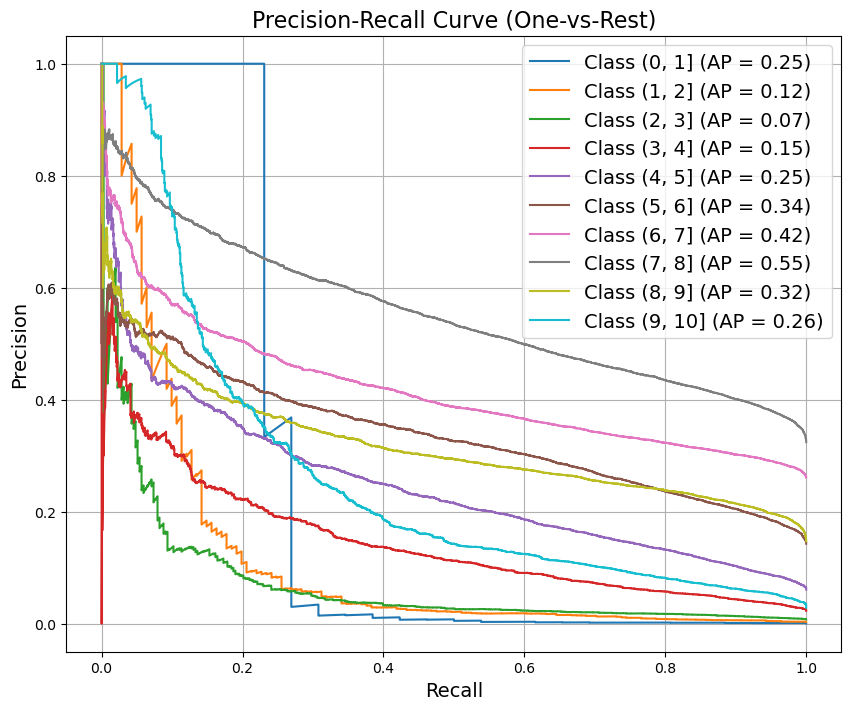

In [17]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # Precision-Recall curve per la classe i
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    ap = average_precision_score(y_test_binarized[:, i], y_pred_proba[:, i])
    
    # Traccia la curva Precision-Recall
    plt.plot(recall, precision, label=f"Class {class_label} (AP = {ap:.2f})")

# Personalizza il grafico
plt.xlabel("Recall",fontsize=14)
plt.ylabel("Precision",fontsize=14)
plt.title("Precision-Recall Curve (One-vs-Rest)",fontsize=16)
plt.legend(loc="upper right",fontsize=14)
plt.grid()
plt.show()